Veena Ghorakavi

In [0]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from google.colab import files
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
#Please comment out this line of code if unnecessary
#uploaded = files.upload()

In [281]:
Data = pd.read_csv("bank-full.csv")
Data.head(10) #several missing values!

age           job   marital  education  ... pdays  previous poutcome Target
0   58    management   married   tertiary  ...    -1         0  unknown     no
1   44    technician    single  secondary  ...    -1         0  unknown     no
2   33  entrepreneur   married  secondary  ...    -1         0  unknown     no
3   47   blue-collar   married    unknown  ...    -1         0  unknown     no
4   33       unknown    single    unknown  ...    -1         0  unknown     no
5   35    management   married   tertiary  ...    -1         0  unknown     no
6   28    management    single   tertiary  ...    -1         0  unknown     no
7   42  entrepreneur  divorced   tertiary  ...    -1         0  unknown     no
8   58       retired   married    primary  ...    -1         0  unknown     no
9   43    technician    single  secondary  ...    -1         0  unknown     no

[10 rows x 17 columns]

Univariate analysis:
a.) Univariate analysis-data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b.) Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c.) Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [282]:
Data.shape

(45211, 17)

In [283]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [284]:
Data.tail()

age           job   marital  education  ... pdays  previous poutcome Target
45206   51    technician   married   tertiary  ...    -1         0  unknown    yes
45207   71       retired  divorced    primary  ...    -1         0  unknown    yes
45208   72       retired   married  secondary  ...   184         3  success    yes
45209   57   blue-collar   married  secondary  ...    -1         0  unknown     no
45210   37  entrepreneur   married  secondary  ...   188        11    other     no

[5 rows x 17 columns]

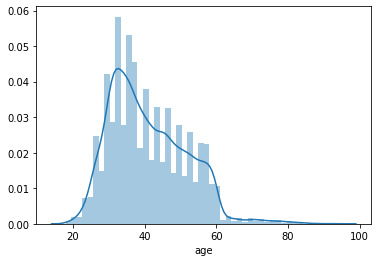

In [285]:
sns.distplot(Data['age'])

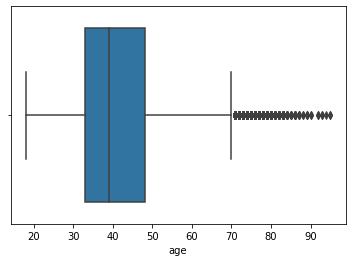

In [286]:
sns.boxplot(Data.age)

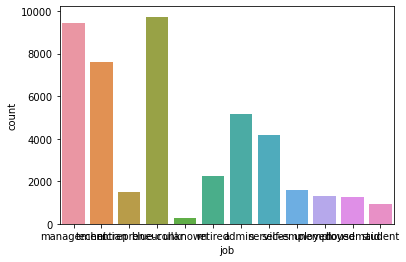

In [287]:
sns.countplot(Data['job'])

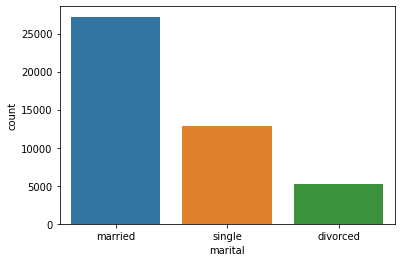

In [288]:
sns.countplot(Data['marital'])

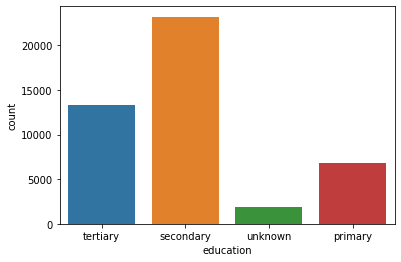

In [289]:
sns.countplot(Data['education'])

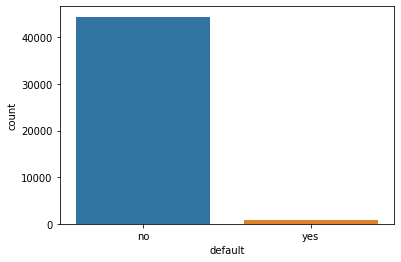

In [290]:
sns.countplot(Data['default'])

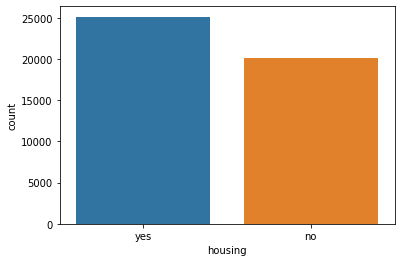

In [291]:
sns.countplot(Data['housing'])

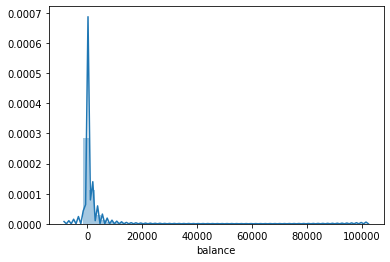

In [292]:
sns.distplot(Data['balance'])

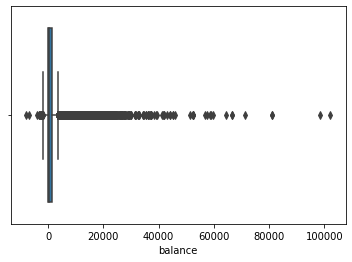

In [293]:
sns.boxplot(Data.balance)

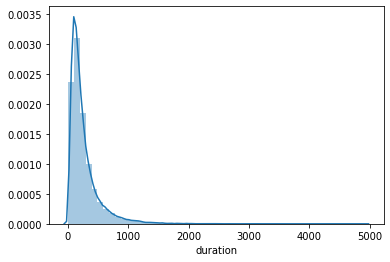

In [294]:
sns.distplot(Data['duration'])

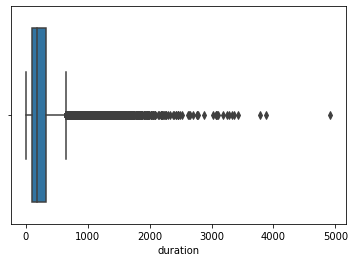

In [295]:
sns.boxplot(Data.duration)

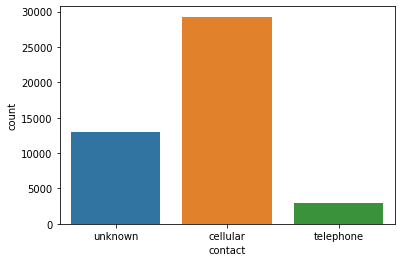

In [296]:
sns.countplot(Data['contact'])

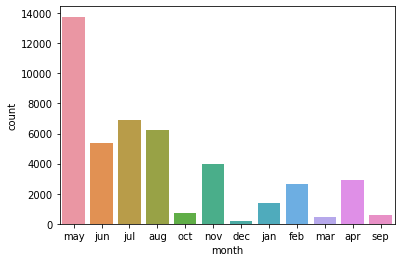

In [297]:
sns.countplot(Data.month)

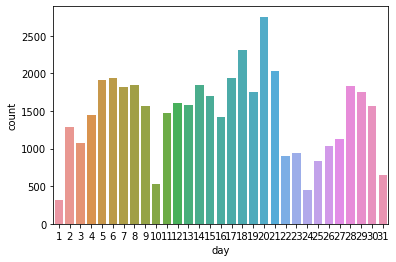

In [298]:
sns.countplot(Data.day)

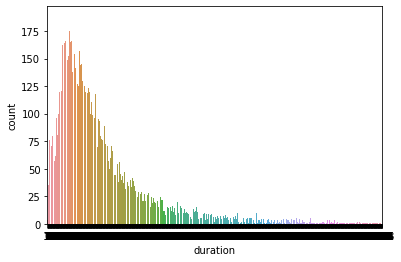

In [299]:
sns.countplot(Data.duration)

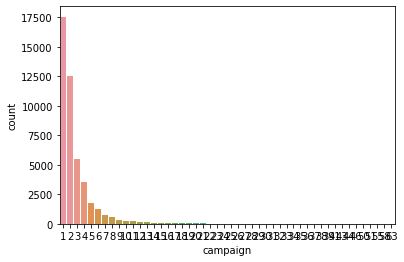

In [300]:
sns.countplot(Data.campaign)

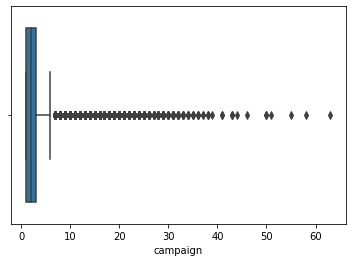

In [301]:
sns.boxplot(Data.campaign)

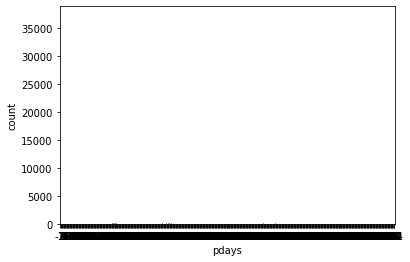

In [302]:
sns.countplot(Data.pdays)

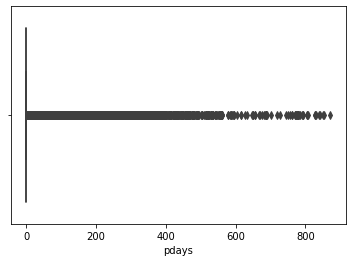

In [303]:
sns.boxplot(Data.pdays)

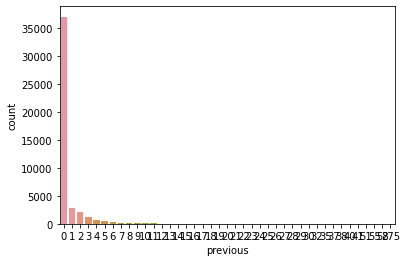

In [304]:
sns.countplot(Data.previous)

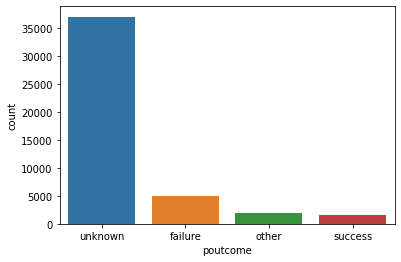

In [305]:
sns.countplot(Data.poutcome)

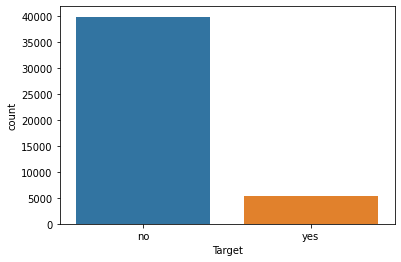

In [306]:
sns.countplot(Data.Target)

In [307]:
Data.isnull().values.any() 

False

As per the data analysis, the data is valid. Unknown values will be assigned a weight of -1 as the values are not useful for data analysis. There is no absentee data. The data that is categorical will be given numerical value.

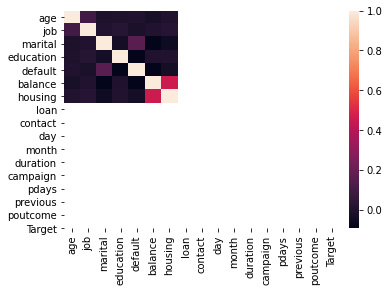

In [308]:
sns.heatmap(Data.corr(), xticklabels = Data.columns.values, yticklabels = Data.columns.values)

The next steps will be to convert categorical into numerical data so further insights are provided.

Deliverable –2 (Prepare the data for analytics)–(10)
1.Ensure the attribute types are correct. If not, take appropriate actions.
2.Get the data model ready. 
3.Transform the data i.e. scale / normalize if required4.Create the training set and test set in ratioof 70:30

In [309]:
for col in Data.columns:
    if Data[col].dtype == 'object':
        Data[col] = pd.Categorical(Data[col])
Data.head(10)

age           job   marital  education  ... pdays  previous poutcome Target
0   58    management   married   tertiary  ...    -1         0  unknown     no
1   44    technician    single  secondary  ...    -1         0  unknown     no
2   33  entrepreneur   married  secondary  ...    -1         0  unknown     no
3   47   blue-collar   married    unknown  ...    -1         0  unknown     no
4   33       unknown    single    unknown  ...    -1         0  unknown     no
5   35    management   married   tertiary  ...    -1         0  unknown     no
6   28    management    single   tertiary  ...    -1         0  unknown     no
7   42  entrepreneur  divorced   tertiary  ...    -1         0  unknown     no
8   58       retired   married    primary  ...    -1         0  unknown     no
9   43    technician    single  secondary  ...    -1         0  unknown     no

[10 rows x 17 columns]

In [0]:
replaceStruct = {"job": {"management": 1, "technician":2 , "entrepreneur": 3, "blue-collar": 4,"retired": 5, "admin.": 6, "student" :7, "housemaid": 8, "services" : 9, "self-employed" :10, "unemployed" : 11, "unknown": -1}, "marital" : {"single" : 1, "married" : 2, "divorced" : 3}, "education" : {"primary": 1, "secondary" : 2, "tertiary": 3, "unknown": -1}, "default" : {"yes": 1, "no" : 0}, "housing" : {"yes" : 1, "no" : 0}, "loan" : {"yes" : 1, "no" : 0}, "month" : {"jan": 1, "feb" : 2, "mar" : 3, "apr" : 4, "may" : 5, "jun" : 6, "jul" : 7, "aug" : 8, "sep" : 9, "oct" : 10, "nov" : 11, "dec" : 12}, "contact" :{"unknown" : -1, "cellular": 1, "telephone": 2}, "poutcome" : {"unknown" : -1, "success" : 1, "failure" : 2, "other" : 3}, "Target" : {"yes" : 1, "no" : 0} }

In [311]:
Data=Data.replace(replaceStruct)
Data.head(10)

age  job  marital  education  ...  pdays  previous  poutcome  Target
0   58    1        2          3  ...     -1         0        -1       0
1   44    2        1          2  ...     -1         0        -1       0
2   33    3        2          2  ...     -1         0        -1       0
3   47    4        2         -1  ...     -1         0        -1       0
4   33   -1        1         -1  ...     -1         0        -1       0
5   35    1        2          3  ...     -1         0        -1       0
6   28    1        1          3  ...     -1         0        -1       0
7   42    3        3          3  ...     -1         0        -1       0
8   58    5        2          1  ...     -1         0        -1       0
9   43    2        1          2  ...     -1         0        -1       0

[10 rows x 17 columns]

In [312]:
print(Data.age.value_counts())
print(Data.job.value_counts())
print(Data.marital.value_counts())
print(Data.education.value_counts())
print(Data.balance.value_counts())
print(Data.housing.value_counts())
print(Data.loan.value_counts())
print(Data.contact.value_counts())
print(Data.contact.value_counts())
print(Data.day.value_counts())
print(Data.month.value_counts())
print(Data.duration.value_counts())
print(Data.campaign.value_counts())
print(Data.previous.value_counts())
print(Data.poutcome.value_counts())
print(Data.Target.value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
 4     9732
 1     9458
 2     7597
 6     5171
 9     4154
 5     2264
 10    1579
 3     1487
 11    1303
 8     1240
 7      938
-1      288
Name: job, dtype: int64
2    27214
1    12790
3     5207
Name: marital, dtype: int64
 2    23202
 3    13301
 1     6851
-1     1857
Name: education, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
 1    29285
-1    13020
 2     2906
Name: contact, dtype: int64
 1    29285
-1    13020
 2     2906
Name: contact, dtype: int64
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19   

Deliverable –3 (create the ensemble model)–(30)1.First create modelsusing Logistic Regression and Decision Tree algorithm. Note the model performanceby using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1scoreof themodel.(10marks)2.Build the ensemble models(Bagging and Boosting)and note the model performanceby using different matrices. Use same metrics as in above model. (at least 3 algorithms)(15 marks)

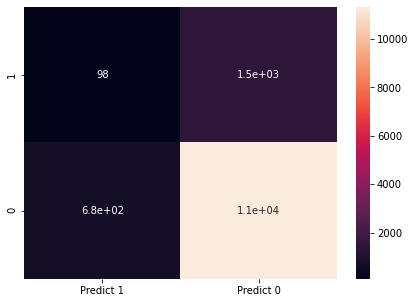

In [313]:
y = Data.Target
X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [0]:
X = Data.drop("Target" , axis=1)
y = Data.pop("Target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [315]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [0]:
train_char_label = ['No', 'Yes']
DataTree_File = open('tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=DataTree_File, feature_names = list(X_train), class_names = list(train_char_label))
DataTree_File.close()

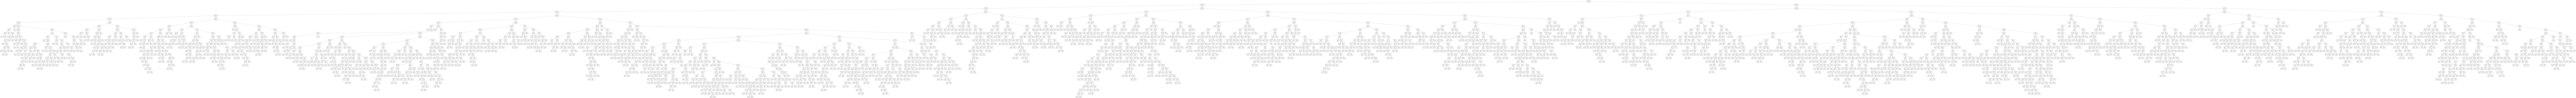

In [317]:
retCode = system("dot -Tpng tree.dot -o tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("tree.png"))

In [318]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9026448004550194
0.9018726039516367


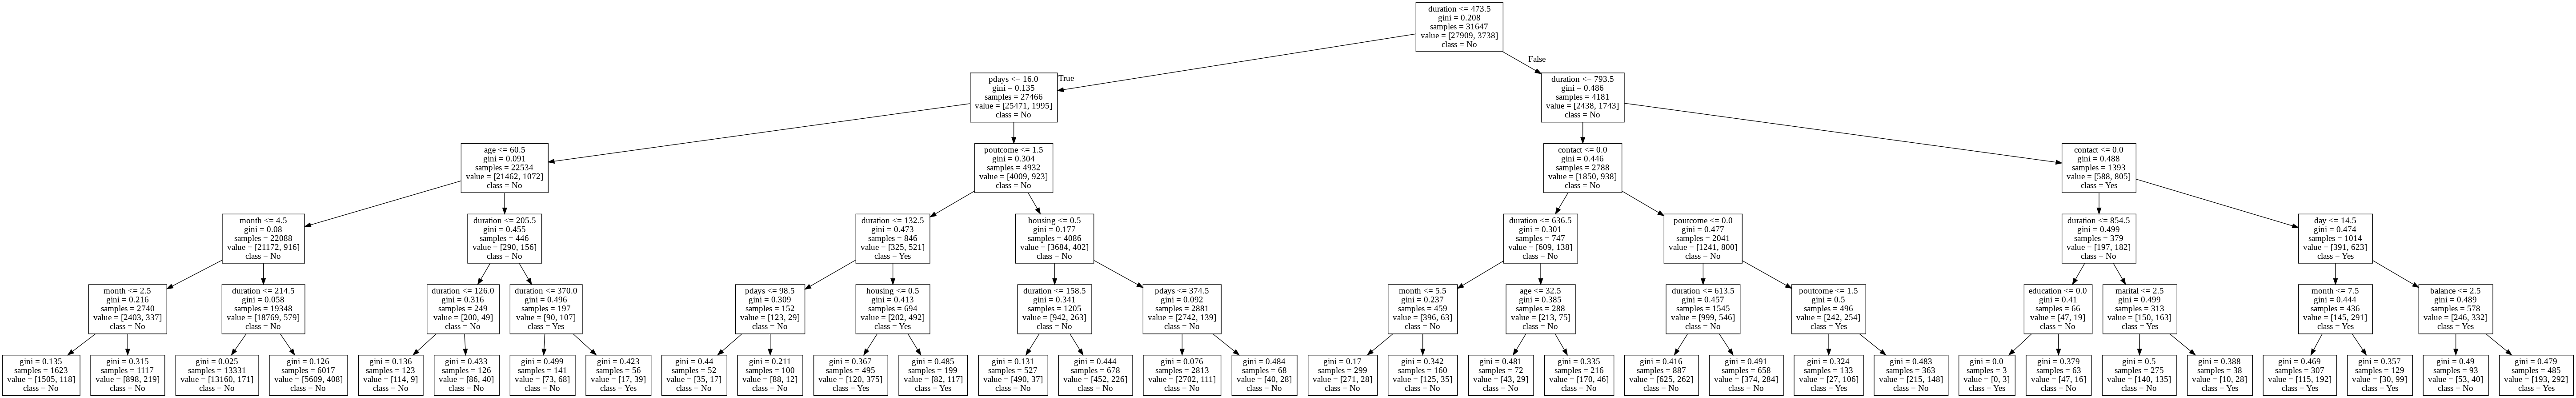

In [319]:
train_char_label = ['No', 'Yes']
DataTree_FileR = open('treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=DataTree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
DataTree_FileR.close()
retCode = system("dot -Tpng treeR.dot -o treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("treeR.png"))

0.9018726039516367


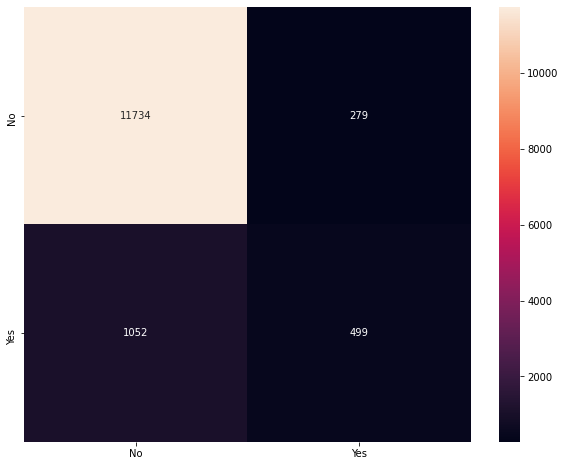

In [320]:
y_predict = dTreeR.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10,8))
print(dTreeR.score(X_test , y_test))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.9071070480684164


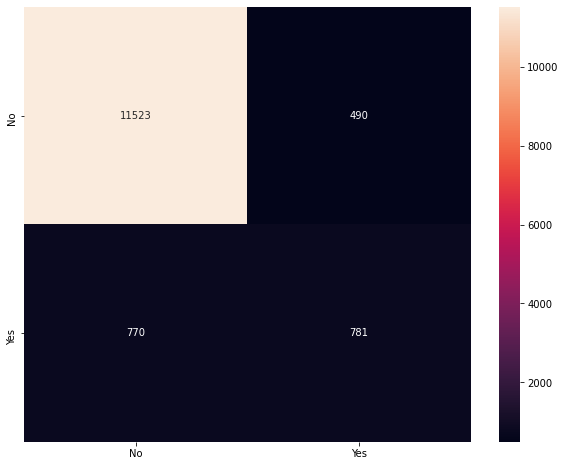

In [321]:
from sklearn.ensemble import BaggingClassifier

Bagging = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1).fit(X_train, y_train)
y_predict = Bagging.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10, 8))
print(Bagging.score(X_test , y_test))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.9071070480684164


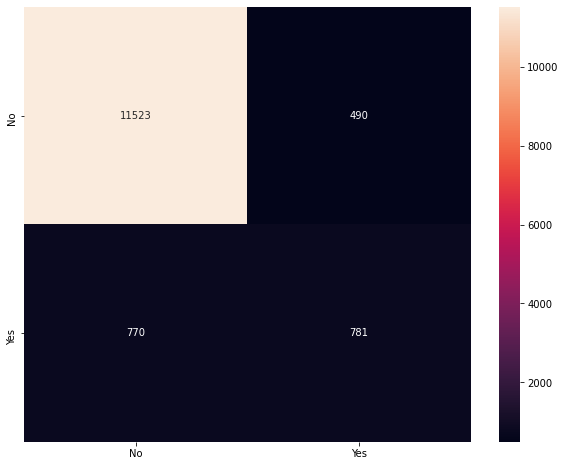

In [322]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10, 8))
sns.heatmap(df_cm, annot=True ,fmt='g')


0.8849896785608965


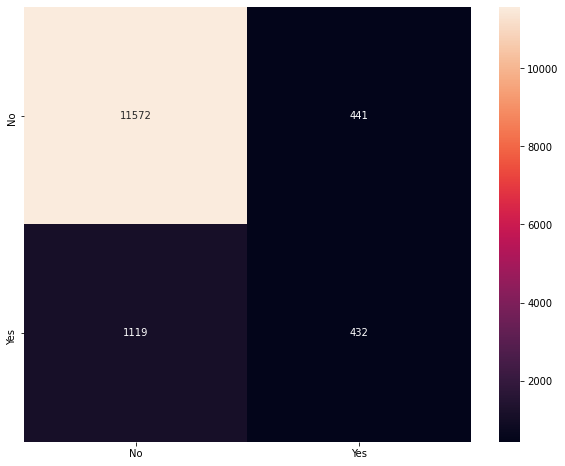

In [323]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=10, random_state=1).fit(X_train, y_train)
y_predict = AdaBoost.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10,8))
print(AdaBoost.score(X_test , y_test))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8990710704806841


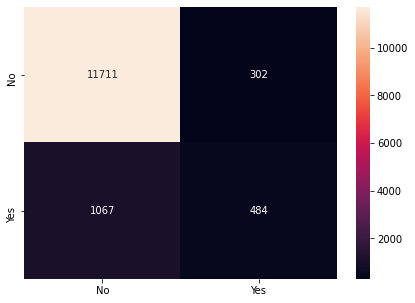

In [324]:
from sklearn.ensemble import GradientBoostingClassifier
GradientClass = GradientBoostingClassifier(n_estimators = 50,random_state=1).fit(X_train, y_train)
y_predict = GradientClass.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
print(GradientClass.score(X_test, y_test))
sns.heatmap(df_cm, annot=True ,fmt='g')

Model Type: LR: Mean: 0.839751 Std Dev: 0.062427
Model Type: DecTree: Mean: 0.780784 Std Dev: 0.055245
Model Type: Bagging: Mean: 0.832585 Std Dev: 0.059034
Model Type: AdaBoost: Mean: 0.838335 Std Dev: 0.062543
Model Type: GradientBoost: Mean: 0.839242 Std Dev: 0.061883


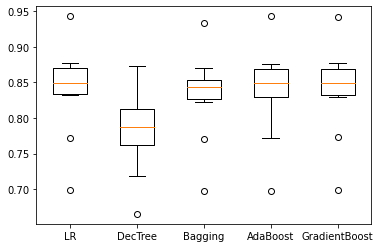

In [325]:
from sklearn import model_selection
# load dataset
Data = pd.read_csv("bank-full.csv")
for feature in Data.columns:
    if Data[feature].dtype == 'object': 
        Data[feature] = pd.Categorical(Data[feature])
replaceStruct = {"job": {"management": 1, "technician":2 , "entrepreneur": 3, "blue-collar": 4,"retired": 5, "admin.": 6, "student" :7, "housemaid": 8, "services" : 9, "self-employed" :10, "unemployed" : 11, "unknown": -1}, "marital" : {"single" : 1, "married" : 2, "divorced" : 3}, "education" : {"primary": 1, "secondary" : 2, "tertiary": 3, "unknown": -1}, "default" : {"yes": 1, "no" : 0}, "housing" : {"yes" : 1, "no" : 0}, "loan" : {"yes" : 1, "no" : 0}, "month" : {"jan": 1, "feb" : 2, "mar" : 3, "apr" : 4, "may" : 5, "jun" : 6, "jul" : 7, "aug" : 8, "sep" : 9, "oct" : 10, "nov" : 11, "dec" : 12}, "contact" :{"unknown" : -1, "cellular": 1, "telephone": 2}, "poutcome" : {"unknown" : -1, "success" : 1, "failure" : 2, "other" : 3}, "Target" : {"yes" : 1, "no" : 0} }
Data=Data.replace(replaceStruct)
array = Data.values
models = []
models.append(('LR', LogisticRegression()))
models.append(('DecTree', DecisionTreeClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoost', GradientBoostingClassifier()))
# evaluate each model in turn
mods = []
nmods = []
for mod_type, model in models:
	Dataresults = model_selection.cross_val_score(model, array[:,0:7], array[:,7], cv = model_selection.KFold(n_splits=10, random_state=1), scoring='accuracy')
	mods.append(Dataresults)
	nmods.append(mod_type)
	print("Model Type: %s: Mean: %f Std Dev: %f" % (mod_type, Dataresults.mean(), Dataresults.std()))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(mods)
ax.set_xticklabels(nmods)
plt.show()

The consensus amongst the models is that bagging and adaptive boosting are better at classifying the dataset. 